## -------------------------------READING,EDA AND PREPARING THE DATA --------------------------------

### 1. READING AND UNDERSTANDING THE DATA


#### IMPORTING LIBRARIES & READING DATA

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [229]:
bike=pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [230]:
bike.shape


(730, 16)

In [231]:
# checking nulls
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


bike['season']=bike['season'].map({'spring':1,'summer':2, 'fall':3, 'winter':4})

In [232]:

bike['season']=bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['mnth']=bike['mnth'].map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"jun",7:"jul",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

bike['weekday']=bike['weekday'].map({0:"mon",1:"tue",2:"wed",3:"thu",4:"fri",5:"sat",6:"sun"})
bike['weathersit']=bike['weathersit'].map({1:"clear",2:"mist",3:"low rain",4:"heavy rain"})

##### Removing unwanted column
- instant = as this column is just index their will be no use of column
- dteday= this column has date and the moths and year are already provided,so, their will be no use of the date.
- casual & registered= As their total is already given in the table as 'cnt', and their presence in the table will give the value of R^2 = 1 ,even after removing the features.

In [233]:
bike=bike.drop(['instant','dteday','casual','registered'],axis=1)

In [234]:
# CHECKING DATA
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,tue,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,wed,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,thu,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,fri,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,sat,1,clear,9.305237,11.46350,43.6957,12.522300,1600


### 2. EDA
- VISUALIZING THE DATA

      - NUMERICAL VARIABLES

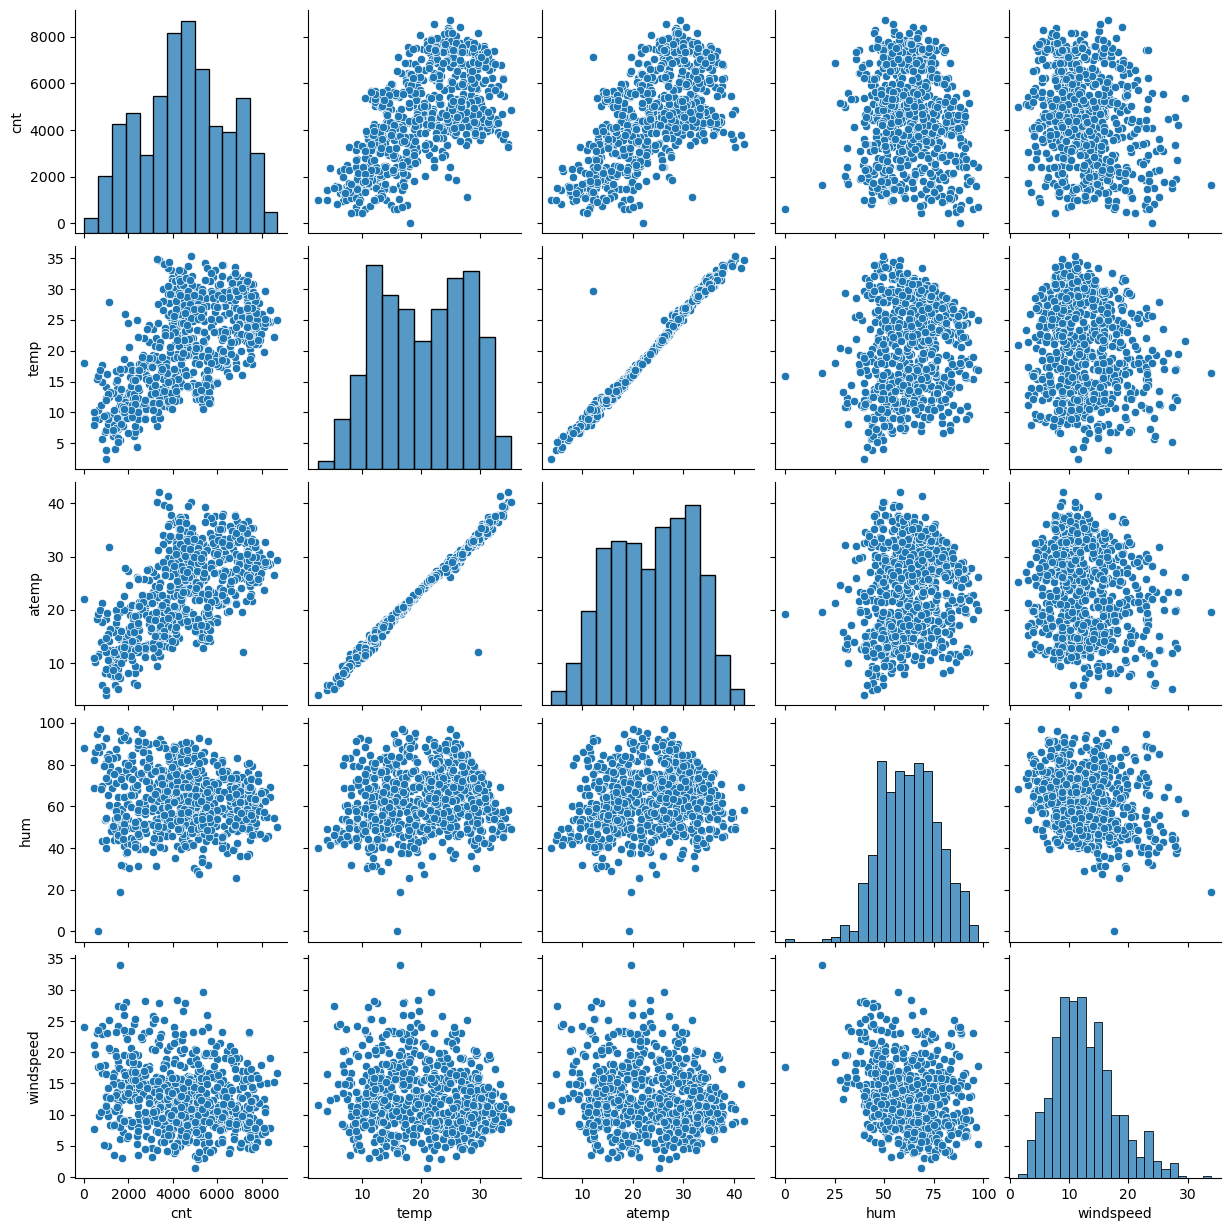

In [235]:
n_var=['cnt','temp','atemp','hum','windspeed']
sns.pairplot(bike[n_var])
plt.show()

##### conclusion
- temp and atemp strongly linearly related to each other as both variables are temprature in celcius 
- cnt(total no of bikes ) and temp are linear correlated to each other.
- very low correlation between humidy and windspeed with counts.So,user count will not be affected when there is humiduty or wind speed. 

     - CATEGORICAL VARIABLES

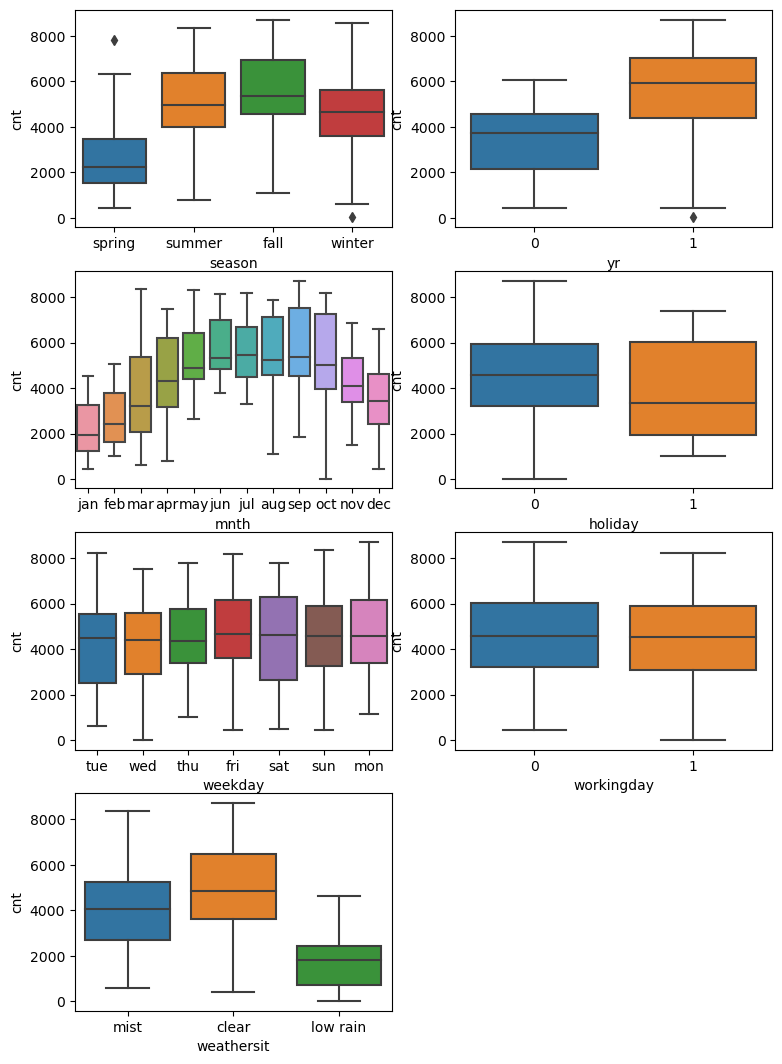

In [236]:
c_var=['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(9,13))
for i in range(0,len(c_var)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data=bike,x=c_var[i],y='cnt')
plt.show()

##### CONCLUSION (BETWEEN CNT AND CATEGORICAL VARIABLES)
- fall season has highest no of counts and highest median.
- 2019 has highest no of user as compare to 2018.
- march and september has maximum no of counts where as jan and oct has minimum no of counts.
- from june to september all have almost same maximum and medium and these months have higher no of counts amongs all months.
- no of users are higher when there is no holiday.
- almost all weekdays has same no of users as they have almost same medium.
- working day has almost same users
- most of the users like  to use the bike whenever the weather is clear,then user count decreases in mist weather ,very less no of user use bike in low rain and no user uses bike in heavy rain weather according to the data.

### 3.  PREPARING THE DATA

#### MAKING DUMMIES('season','mnth','weekday','weathersit')

In [237]:
season_dummy=pd.get_dummies(bike['season'],drop_first=True)
mnth_dummy=pd.get_dummies(bike['mnth'],drop_first=True)
weekday_dummy=pd.get_dummies(bike['weekday'],drop_first=True)
weathersit_dummy=pd.get_dummies(bike['weathersit'],drop_first=True)
print(season_dummy.head())
print(mnth_dummy.head())
print(weekday_dummy.head())
print(weathersit_dummy.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0
   mon  sat  sun  thu  tue  wed
0    0    0    0    0    1    0
1    0    0    0    0    0    1
2    0    0    0    1    0    0
3    0    0    0    0    0    0
4    0    1    0    0    0    0
   low rain  mist
0         0     1
1         0     1
2         0     0
3         0     0
4         0     0


##### concate the dummy variables

In [238]:
bike=pd.concat((bike,season_dummy,mnth_dummy,weekday_dummy,weathersit_dummy),axis=1)

##### Dropping the dummy variables('season','mnth','weekday','weathersit')
- dropping the variables as their work was give dummy variables

In [239]:
bike=bike.drop(['season','mnth','weekday','weathersit'],axis=1)

In [240]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,low rain,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,1,0,0,0,0,0,0


#### SPLITTING THE DATA

In [241]:
# importing the libraries
from sklearn.model_selection import train_test_split

In [242]:
df_train,df_test=train_test_split(bike,train_size=0.7,random_state=100)

#### SCALING THE DATA

In [243]:
# importing libraries
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [244]:
num_var=['temp','atemp','hum','windspeed','cnt']
df_train[num_var]=scaler.fit_transform(df_train[num_var])


In [245]:
# checking the min and max value of the df_train after the rescaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,low rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### CHECKING RELATIONSHIP TO BUILD A MODEL

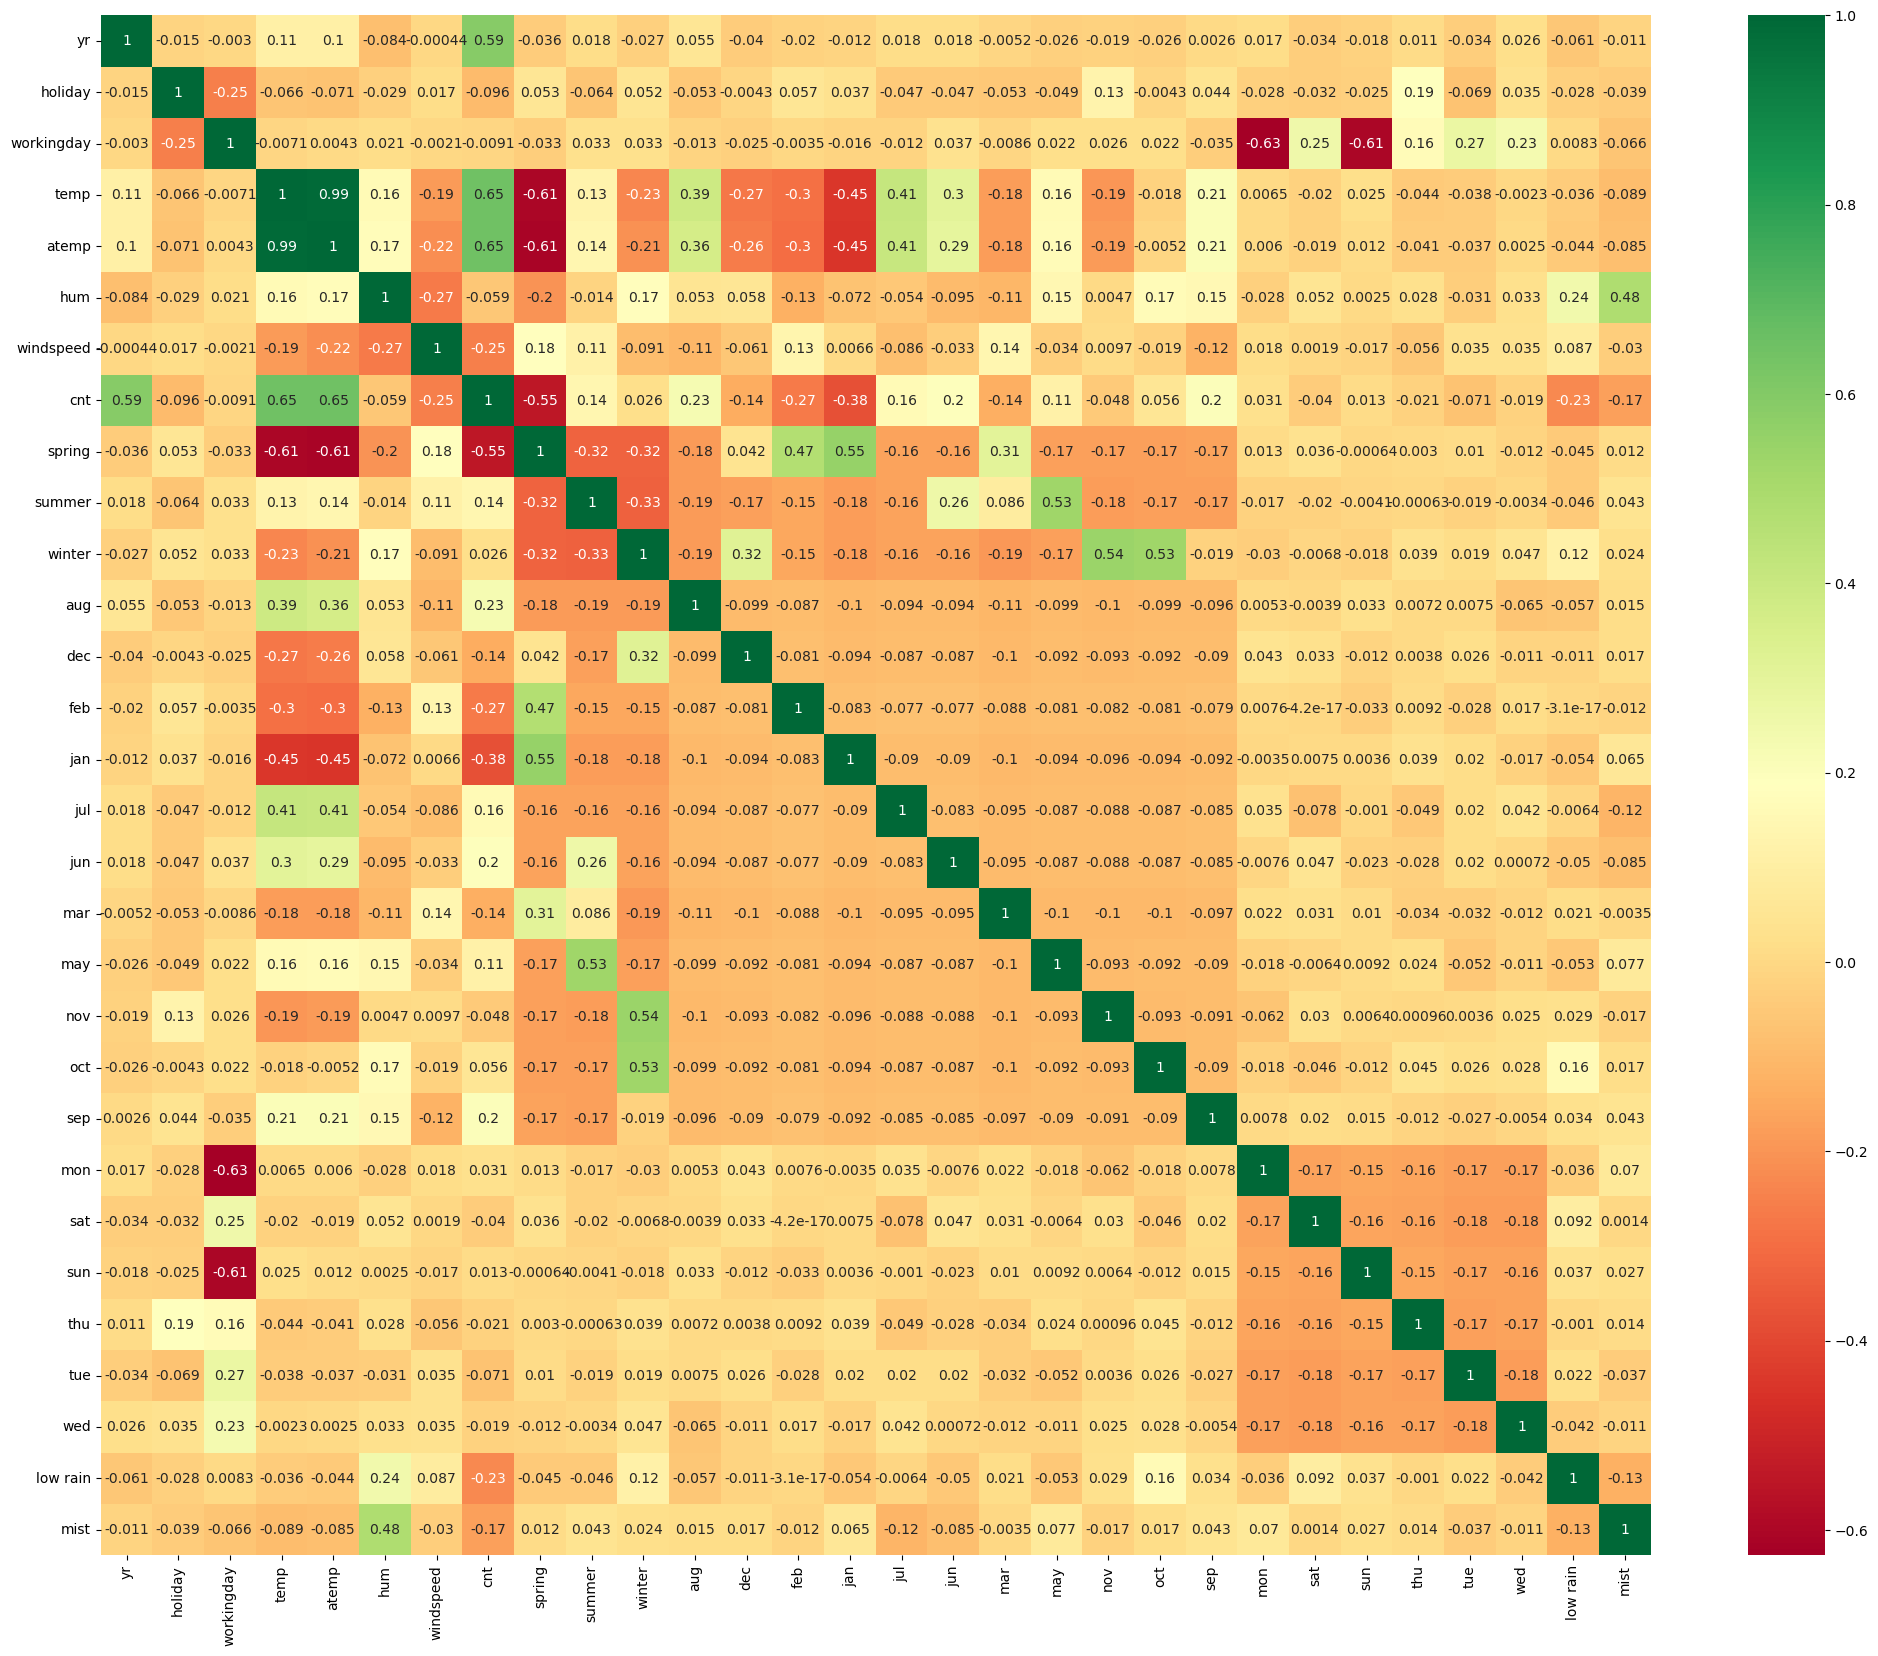

In [246]:

plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')
plt.show()

#### conclusion:
- we can analyse from the heatmap that 'temp' and 'atemp' are most correlated feature with target variable  'cnt'  
- 'springs' has the least correlation with the target variable 'cnt'

#### DIVIDING THE TRAIN TEST DATA 

In [247]:
y_train= df_train.pop('cnt')
X_train=df_train

In [248]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,low rain,mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,...,0,0,0,1,0,0,0,0,0,0
350,0,0,1,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,0,0,0,0,0,1,0,0,1
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,1,0,...,0,0,0,0,0,1,0,0,0,1


## ---------------------------------------------- MODEL BUILDING-----------------------------------------------------

#### CREATING MODELS USING RFE METHOD

In [249]:
# IMPORTING LIBRARIES
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


#### Running RFE

In [250]:
lm=LinearRegression()
lm.fit(X_train,y_train)

# running RFE
rfe= RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

#### List of the feature with their selection status and their rank

In [251]:
list(zip(X_train,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 6),
 ('sat', False, 14),
 ('sun', False, 5),
 ('thu', False, 11),
 ('tue', False, 8),
 ('wed', False, 7),
 ('low rain', True, 1),
 ('mist', True, 1)]

##### features selected

In [252]:
col=X_train.columns[rfe.support_]

##### features not selected

In [253]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [254]:
X_train_rfe=X_train[col]
X_train_rfe

,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,low rain,mist
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,1
79,0,0,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,0,1


In [255]:
# Adding constant
import statsmodels.api as sm

In [256]:
X_train_rfe_1= sm.add_constant(X_train_rfe)
lm_1=sm.OLS(y_train,X_train_rfe_1).fit()

In [257]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          8.15e-189
Time:                        15:46:11   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
jul           -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep            0.0755      0.017      4.466      0.000       0.042       0.109
low rain      -0.2465      0.026     -9.331      0.000      -0.298      -0.195
mist          -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Taking the no of feature 15 as from 16 to 20 R^2 comes almost same and p value after taking the features more than 18 is very high,so after taking 15 features R^2 & p-values comes in acceptable range with less no of features. 

In [258]:
X_train_rfe_1.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,low rain,mist
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


##### Calculating VIF

In [259]:
# importing libraries for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [260]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']= X.columns
vif['VIF']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif= vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,mist,2.32
0,yr,2.09
11,nov,1.85
9,jan,1.75


##### We need the p-value and VIF under 5, we can see from summary of the model that p-values are in acceptable range.So,Dropping 'hum' feature having VIF greater than 5

In [261]:
# dropping 'hum'  from X_train_rfe
X_train_rfe=X_train_rfe.drop('hum',axis=1)


In [262]:
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,summer,winter,dec,jan,jul,nov,sep,low rain,mist
576,1,0,0.815169,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,0,1


##### Creating another model

In [263]:
# Adding constant ,Running model and fiting
X_train_rfe_2=sm.add_constant(X_train_rfe)
lm_2= sm.OLS(y_train,X_train_rfe_2).fit()

In [264]:
# summary
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          4.75e-186
Time:                        15:46:11   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
jul           -0.0500      0.019     -2.703      0.007      -0.086      -0.014
nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
sep            0.0687      0.017      4.015      0.000       0.035       0.102
low rain      -0.2917      0.025    -11.840      0.000      -0.340      -0.243
mist          -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### p-value are under acceptable range and R^2 =0.839

##### Calculating VIF  after droping 'hum'

In [265]:
vif=pd.DataFrame()
X= X_train_rfe
vif['Features']=X.columns
vif['VIF']= [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by= 'VIF',ascending=False)
vif


,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,nov,1.81
8,jan,1.66
9,jul,1.59
13,mist,1.57


- We can see from the VIF value temp has vif greater then 5 but we should not remove it as 'temp' is correlated with 'cnt'.This feature is important and can help in analysis
- The Feature after 'temp' is 'windspeed' and wind speed is less correlated as shown in pairplot fig. So,Droping 'windspeed' feature,After removing it,there can be reduction in VIF of 'temp' as their can be multicollinearity.

In [266]:
# Droping windspeed from X_train_rfe
X_train_rfe=X_train_rfe.drop('windspeed',axis=1)

In [267]:
X_train_rfe


,yr,holiday,temp,spring,summer,winter,dec,jan,jul,nov,sep,low rain,mist
576,1,0,0.815169,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0,0,1,1,0,0,0,0,0,1
79,0,0,0.462664,0,1,0,0,0,0,0,0,0,1


#### creating another model

In [268]:
# Adding constant,Running model and fitting.
X_train_rfe_3= sm.add_constant(X_train_rfe)
lm_3= sm.OLS(y_train,X_train_rfe_3).fit()

In [269]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          5.35e-179
Time:                        15:46:11   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1837      0.032      5.775      0.000       0.121       0.246
yr             0.2332      0.008     27.496      0.000       0.217       0.250
holiday       -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temp           0.4624      0.037     12.346      0.000       0.389       0.536
spring        -0.0830      0.022     -3.734      0.000      -0.127      -0.039
summer         0.0266      0.016      1.661      0.097      -0.005       0.058
winter         0.0902      0.019      4.834      0.000       0.054       0.127
dec           -0.0332      0.018     -1.810      0.071      -0.069       0.003
jan           -0.0333      0.019     -1.765      0.078      -0.070       0.004
jul           -0.0512      0.019     -2.663      0.008      -0.089      -0.013
nov           -0.0415      0.020     -2.091      0.037      -0.081      -0.003
sep            0.0739      0.018      4.167      0.000       0.039       0.109
low rain      -0.3060      0.025    -12.014      0.000      -0.356      -0.256
mist          -0.0787      0.009     -8.707      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Calculating VIF from X_train_rfe after droping 'windspeed'

In [270]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Feature']= X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif=vif.sort_values(by= 'VIF',ascending=False)
vif

,Feature,VIF
2,temp,4.30
5,winter,2.81
3,spring,2.12
0,yr,2.07
4,summer,1.94
9,nov,1.79
7,jan,1.65
8,jul,1.59
12,mist,1.56
6,dec,1.47


- As we can see that the VIF values are under acceptable range but we can also see that the p-value are above 5.So, we need to drop the feature
- summer,jan and dec has p-values .097,0.078 and 0.071 respectively.
- first need to drop summer feature then there can be changes in p-values of jan,dec.

In [271]:
X_train_rfe=X_train_rfe.drop('summer',axis=1)

In [272]:
X_train_rfe.head()

,yr,holiday,temp,spring,winter,dec,jan,jul,nov,sep,low rain,mist
576,1,0,0.815169,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,1,0,0,0,0,0,0,0,1
728,1,0,0.245101,1,0,1,0,0,0,0,0,0
482,1,0,0.395666,0,0,0,0,0,0,0,0,1
111,0,0,0.345824,0,0,0,0,0,0,0,0,1


#### Creating another model

In [273]:
# adding constant,running model and fitting.
X_train_rfe_4=sm.add_constant(X_train_rfe)

lm_4= sm.OLS(y_train,X_train_rfe_4).fit()

In [274]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 01 Aug 2023   Prob (F-statistic):          1.47e-179
Time:                        15:46:11   Log-Likelihood:                 483.91
No. Observations:                 510   AIC:                            -941.8
Df Residuals:                     497   BIC:                            -886.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2196      0.023      9.390      0.000       0.174       0.266
yr             0.2337      0.008     27.520      0.000       0.217       0.250
holiday       -0.0935      0.027     -3.453      0.001      -0.147      -0.040
temp           0.4335      0.033     13.046      0.000       0.368       0.499
spring        -0.1084      0.016     -6.691      0.000      -0.140      -0.077
winter         0.0710      0.015      4.835      0.000       0.042       0.100
dec           -0.0387      0.018     -2.139      0.033      -0.074      -0.003
jan           -0.0381      0.019     -2.035      0.042      -0.075      -0.001
jul           -0.0624      0.018     -3.465      0.001      -0.098      -0.027
nov           -0.0472      0.020     -2.405      0.017      -0.086      -0.009
sep            0.0621      0.016      3.814      0.000       0.030       0.094
low rain      -0.3073      0.026    -12.048      0.000      -0.357      -0.257
mist          -0.0784      0.009     -8.670      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       77.837   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.191
Skew:                          -0.738   Prob(JB):                     2.53e-48
Kurtosis:                       5.852   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### calculating VIF from X_train_rfe after removing 'summer'

In [275]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by= 'VIF',ascending=False)
vif

,Features,VIF
2,temp,3.04
4,winter,2.53
0,yr,2.05
3,spring,1.93
8,nov,1.79
6,jan,1.65
11,mist,1.53
5,dec,1.46
7,jul,1.34
9,sep,1.20


##### Now we can see that the p-values and VIF are under acceptable range i.e., They are under 5

### RESIDUAL ANALYSIS OF TRAIN DATA 
- Now to check whether the errors term are normaly distributed as it one of the assumptions of linear regression
- predicting the train set 
- calculting residual [(X_train)-(X_pred)]

In [276]:
# predicting from the final model
y_train_pred=lm_4.predict(X_train_rfe_4)

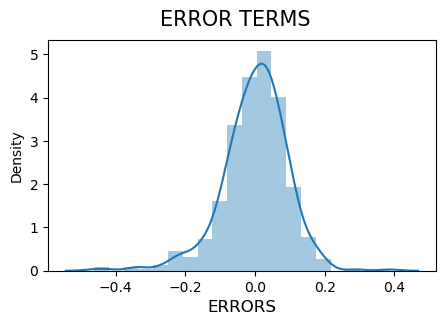

In [277]:
# calculating residuals and plotting histogram
res=(y_train)-(y_train_pred)

# plotting histogram 
fig=plt.figure(figsize=(5,3))
sns.distplot(res,bins=20)
fig.suptitle('ERROR TERMS',fontsize=15)
plt.xlabel('ERRORS',fontsize=12)
plt.show()

##### We can see from the fig that the errors are almost normally distributed

### MAKING PREDICTION OF FINAL MODEL


##### Checking and Applying the scaling on the test set
- Transforming the test set,not fitting it

In [278]:
# Taking the numerical variable we took in train set for scaling
num_var=['temp','atemp','hum','windspeed','cnt']
df_test[num_var]= scaler.transform(df_test[num_var])

In [279]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,low rain,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.154545,0.131818,0.172727,0.159091,0.118182,0.122727,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.362295,0.339064,0.378873,0.366595,0.323559,0.328872,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing test set into X_test and y_test

In [280]:
y_test=df_test.pop('cnt')
X_test=df_test

##### Updating the X_test columns by keeping the column which are present in the final X_train

In [281]:
# updating columns
X_test_new= X_test[X_train_rfe.columns]

In [282]:
# adding constant
X_test_new=sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,holiday,temp,spring,winter,dec,jan,jul,nov,sep,low rain,mist
184,1.0,0,1,0.831783,0,0,0,0,1,0,0,0,1
535,1.0,1,0,0.901354,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0,1,0,0,0,0,0,0,1
221,1.0,0,0,0.881625,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0,0,0,0,0,0,0,0,0


##### MAKING PREDICTION ON THE TEST SET

In [283]:
y_test_pred=lm_4.predict(X_test_new)

## --------------------------------------------------EVALUATION-------------------------------------------------------------
- Calculating R-SQUARE
- Plotting y_test_pred & y_test to check the spread

### Calculating R-squared and comparing it.
- [(y_test)-(y_test_pred)]

In [284]:
# importing required library
from sklearn.metrics import r2_score

In [285]:
r2_score(y_test,y_test_pred)

0.8213566850206266

##### Conclusion
We can see that R-squared for trainset is 0.825 and for Test_set is 0.821 which shows almost equal values and The model has used the same data which is used for test set perfectly 

### Checking the spread

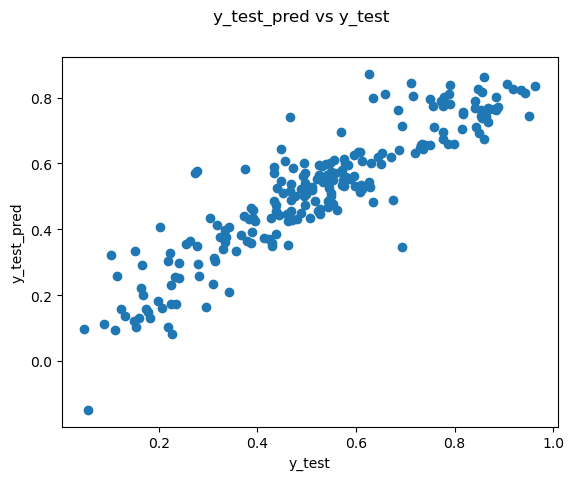

In [286]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test_pred vs y_test')
plt.ylabel('y_test_pred')
plt.xlabel('y_test')
plt.show()

The graph shows perfect correlation between features variable and the target variables


In [287]:
final=pd.DataFrame(lm_4.params)
final.insert(0,'variable',final.index)
final.rename(columns={0:'coefficient value'},inplace=True)
final['index']=list(range(0,13))
final.set_index('index',inplace=True)
final=final.sort_values(by= 'coefficient value',ascending=False)
final

,variable,coefficient value
index,,
3,temp,0.433502
1,yr,0.233663
0,const,0.219617
5,winter,0.071031
10,sep,0.062056
7,jan,-0.038062
6,dec,-0.038661
9,nov,-0.047174
8,jul,-0.062416


##### EQUATION FOR BEST FIT LINE
 0.219+ temp*(0.433) + yr *(0.233) +winter*(0.0710) +sep*(0.062) +jan*(-0.038) +dec *(-0.0386) +nov*(-0.0471) +jul*(-0.0624) +mist*(-0.078449+ holiday*(-0.0935)+ spring*(-0.108) +low rain*(-0.307)
 
- These are the features which can directly affect the count of rental bikes.
- all positive value tells that every unit increase in that variable there will be increase in the count by the coefficient
- all negative value tells that every unit increase in that variable there will be decrease in the count by the coefficient
 

##### CONCLUSION:-

- 'temp' and 'year' has highest correlation with the target variable.
- 'low rain' in weathersit feature can affect the count as the coefficient of the low rain is in negative. 
- We have a decent model with R-squared=0.825,p-value and VIF values less than 5.
- The model demonstrates a strong predictive power, as evidenced by the close alignment of the predicted values with the actual data points in the plot.
- The model is well-fitted to the data and that the assumptions of linear regression, such as homoscedasticity, are met.
- The R-squared value of the model is high, indicating that a significant proportion of the variance in the dependent variable can be explained by the independent variables used in the model.
- Based on the evaluation,R-squared,plot of the linear regression model, we found that overall performance of the model is good 